<a href="https://colab.research.google.com/github/OmahTechLtd/Agriculture/blob/main/Agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# --- 1. Mount Google Drive (if using Drive) ---
from google.colab import drive
drive.mount('/content/drive')

# --- 2. Imports ---
import os
import pandas as pd

# --- 3. Paths (adjust these) ---
# Path to the full HarvestStat CSV in your Drive or to download it
full_csv_path = '/content/drive/MyDrive/MLDatasets/hvstat_africa_data_v1.0.csv'

# Output path for Nigeria subset
output_dir = '/content/drive/MyDrive/datasets'
os.makedirs(output_dir, exist_ok=True)
nigeria_csv_path = os.path.join(output_dir, 'hvstat_nigeria_subset.csv')

# --- 4. Load the full dataset (or part of it) ---
df = pd.read_csv(full_csv_path)

# --- 5. Subset for Nigeria only ---
df_nigeria = df[df['country'].str.lower() == 'nigeria'].copy()

# Optionally, drop columns you won't use to reduce size
# e.g., keep: fnid, admin_1, admin_2, product, year, area, production, yield
keep_cols = [
    'fnid', 'country', 'country_code', 'admin_1', 'admin_2',
    'product', 'planting_year', 'harvest_year',
    'area', 'production', 'yield'
]
df_nigeria = df_nigeria[keep_cols]

# --- 6. Save the subset ---
df_nigeria.to_csv(nigeria_csv_path, index=False)
print("✅ Nigeria subset saved to:", nigeria_csv_path)
print("Rows:", len(df_nigeria))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Nigeria subset saved to: /content/drive/MyDrive/datasets/hvstat_nigeria_subset.csv
Rows: 9636


In [15]:
import os

# Root path for project assets
project_root = "/content/assets/agriculture"

# Create folders
EDA_DIR = os.path.join(project_root, "eda_charts")
os.makedirs(os.path.join(project_root, "models"), exist_ok=True)

print("Folders created successfully!")

Folders created successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Saving models
import joblib
import os

In [8]:
# Replace with your actual dataset path in Drive
dataset_path = "/content/drive/MyDrive/datasets/hvstat_nigeria_subset.csv"

# Load the dataset
df = pd.read_csv(dataset_path)

# Preview
df.head()

,fnid,country,country_code,admin_1,admin_2,product,planting_year,harvest_year,area,production,yield
0,NG1996A101,Nigeria,NG,Abia,none,Banana,2019,2019,16700.0,138300.0,8.281437
1,NG1996A101,Nigeria,NG,Abia,none,Banana,2020,2020,18800.0,139000.0,7.393617
2,NG1996A101,Nigeria,NG,Abia,none,Banana,2021,2021,18800.0,139000.0,7.393617
3,NG1996A101,Nigeria,NG,Abia,none,Cassava,1999,1999,19760.0,346800.0,17.550607
4,NG1996A101,Nigeria,NG,Abia,none,Cassava,2000,2000,14290.0,250000.0,17.494752


In [9]:
# Dataset info
df.info()

# Missing values check
print("Missing values per column:\n", df.isnull().sum())

# Quick statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9636 entries, 0 to 9635
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fnid           9636 non-null   object 
 1   country        9636 non-null   object 
 2   country_code   9636 non-null   object 
 3   admin_1        9636 non-null   object 
 4   admin_2        9636 non-null   object 
 5   product        9636 non-null   object 
 6   planting_year  9636 non-null   int64  
 7   harvest_year   9636 non-null   int64  
 8   area           9111 non-null   float64
 9   production     9546 non-null   float64
 10  yield          9021 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 828.2+ KB
Missing values per column:
 fnid               0
country            0
country_code       0
admin_1            0
admin_2            0
product            0
planting_year      0
harvest_year       0
area             525
production        90
yield            61

,planting_year,harvest_year,area,production,yield
count,9636.000000,9636.000000,9.111000e+03,9.546000e+03,9021.000000
mean,2011.174969,2011.174969,9.484158e+04,3.235217e+05,3.474876
std,7.029060,7.029060,1.131265e+05,6.689752e+05,5.283276
min,1999.000000,1999.000000,1.000000e+01,3.000000e+01,0.002153
25%,2005.000000,2005.000000,1.773500e+04,2.230000e+04,0.905520
50%,2011.000000,2011.000000,5.039000e+04,8.308000e+04,1.528302
75%,2017.000000,2017.000000,1.377050e+05,2.657050e+05,3.846980
max,2023.000000,2023.000000,1.960000e+06,6.261850e+06,139.382239


In [10]:
#  Drop irrelevant columns
df.drop(columns=['fnid', 'country_code'], inplace=True)

#  Handle missing values
df.fillna({
    'area': df['area'].median(),
    'production': df['production'].median(),
    'yield': df['yield'].median()
}, inplace=True)

#  Verify cleanup
print("Missing values after cleanup:\n", df.isnull().sum())
df.head()

Missing values after cleanup:
 country          0
admin_1          0
admin_2          0
product          0
planting_year    0
harvest_year     0
area             0
production       0
yield            0
dtype: int64


,country,admin_1,admin_2,product,planting_year,harvest_year,area,production,yield
0,Nigeria,Abia,none,Banana,2019,2019,16700.0,138300.0,8.281437
1,Nigeria,Abia,none,Banana,2020,2020,18800.0,139000.0,7.393617
2,Nigeria,Abia,none,Banana,2021,2021,18800.0,139000.0,7.393617
3,Nigeria,Abia,none,Cassava,1999,1999,19760.0,346800.0,17.550607
4,Nigeria,Abia,none,Cassava,2000,2000,14290.0,250000.0,17.494752


In [11]:
df.to_csv("/content/assets/agriculture/nigeria_agriculture_clean.csv", index=False)

In [17]:

# ==============================
#  EDA Charts
# ==============================

# ------------------------------
# Chart 1: Yield Distribution by Product
# ------------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(x='product', y='yield', hue='product', data=df, palette='viridis', legend=False)
plt.title("Yield Distribution by Product", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(EDA_DIR, "yield_distribution_by_product.png"))
plt.close()
print("Saved: yield_distribution_by_product.png")

# ------------------------------
# Chart 2: Area vs Production Scatter Plot
# ------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='production', hue='product', data=df, palette='tab10')
plt.title("Area vs Production", fontsize=16)
plt.xlabel("Farming Area (hectares)")
plt.ylabel("Production (metric tons)")
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(EDA_DIR, "area_vs_production.png"))
plt.close()
print("Saved: area_vs_production.png")

# ------------------------------
# Chart 3: Correlation Heatmap
# ------------------------------
plt.figure(figsize=(6, 4))
numeric_df = df[['area', 'production', 'yield']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(EDA_DIR, "correlation_heatmap.png"))
plt.close()
print("Saved: correlation_heatmap.png")

# ------------------------------
# Chart 4: Top Products by Average Yield
# ------------------------------
plt.figure(figsize=(10, 6))
top_products = df.groupby('product')['yield'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette='cividis', legend=False)
plt.title("Top 10 Products by Average Yield", fontsize=16)
plt.xlabel("Average Yield")
plt.ylabel("Product")
plt.tight_layout()
plt.savefig(os.path.join(EDA_DIR, "top_products_by_yield.png"))
plt.close()
print("Saved: top_products_by_yield.png")

# ==============================
# 6. Final Check
# ==============================
print("\nEDA Completed! Files saved in:", EDA_DIR)
print("\nFiles:", os.listdir(EDA_DIR))

Saved: yield_distribution_by_product.png
Saved: area_vs_production.png
Saved: correlation_heatmap.png
Saved: top_products_by_yield.png

EDA Completed! Files saved in: /content/assets/agriculture/eda_charts

Files: ['top_products_by_yield.png', 'area_vs_production.png', 'yield_distribution_by_product.png', 'correlation_heatmap.png']



Training Set Shape: (7708, 4)
Testing Set Shape: (1928, 4)

Scaler saved: scaler.pkl

Linear Regression Results
R² Score: 0.4647
RMSE: 3.1684
Linear Regression model saved!

Random Forest Results
R² Score: 0.7429
RMSE: 2.1956
Random Forest model saved!

Model Comparison:
               Model  R2 Score      RMSE
0  Linear Regression  0.464681  3.168390
1      Random Forest  0.742926  2.195639


/tmp/ipython-input-4037371695.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=results_df, palette='viridis')


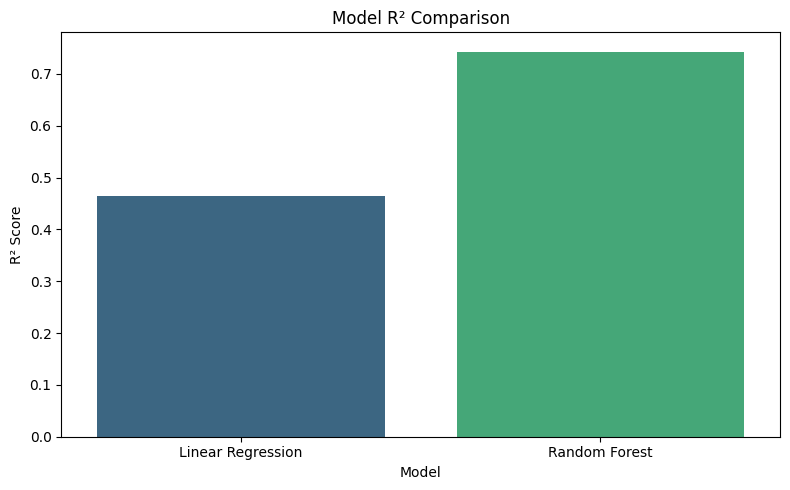

/tmp/ipython-input-4037371695.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette='cividis')


Feature importance chart saved!

All models and charts saved successfully in /content/assets/agriculture/


In [19]:
# ======================================
# 🌾 Agriculture Crop Yield Prediction
# ======================================

# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# --- Ensure folders exist ---
os.makedirs("/content/assets/agriculture/models", exist_ok=True)



# ================================
# 1️⃣ Features and Target Selection
# ================================
# Predicting 'yield'
X = df[['area', 'production', 'planting_year', 'harvest_year']]
y = df['yield']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

# ================================
# 2️⃣ Feature Scaling
# ================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler
joblib.dump(scaler, "/content/assets/agriculture/models/scaler.pkl")
print("\nScaler saved: scaler.pkl")

# ================================
# 3️⃣ Train Linear Regression
# ================================
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predict & Evaluate
y_pred_lr = lin_reg.predict(X_test_scaled)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("\nLinear Regression Results")
print(f"R² Score: {r2_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")

# Save model
joblib.dump(lin_reg, "/content/assets/agriculture/models/linear_regression_model.pkl")
print("Linear Regression model saved!")

# ================================
# 4️⃣ Train Random Forest
# ================================
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict & Evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("\nRandom Forest Results")
print(f"R² Score: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")

# Save model
joblib.dump(rf_model, "/content/assets/agriculture/models/random_forest_model.pkl")
print("Random Forest model saved!")

# ================================
# 5️⃣ Compare Results
# ================================
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R2 Score': [r2_lr, r2_rf],
    'RMSE': [rmse_lr, rmse_rf]
})

print("\nModel Comparison:")
print(results_df)

# Plot Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='R2 Score', data=results_df, palette='viridis')
plt.title("Model R² Comparison")
plt.ylabel("R² Score")
plt.tight_layout()
plt.show()

# ================================
# 6️⃣ Feature Importance (Random Forest)
# ================================
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=features, palette='cividis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()

# Save the chart
plt.savefig("/content/assets/agriculture/eda_charts/feature_importance.png")
plt.close()
print("Feature importance chart saved!")

print("\nAll models and charts saved successfully in /content/assets/agriculture/")